In [1]:
# Plotting Libraries and default stuff
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

# Bayesian Optimization
from GPyOpt.methods import BayesianOptimization
from scenarios import AASinglePond
import pickle
import glob 

# Define the performance 
def f_loss(x):
    """
    Objective to be optimized by the bayesian optimizer

    Params:
    ---------------------------------------------------
    x     : (ndarray) valve positions 

    Returns:
    ---------------------------------------------------
    loss  : (float) performance metric 
    """
    outflow, overflow1, depth= AASinglePond(x[0][0])
    loss = 0.0
    for i,j in zip(outflow, depth):
        if i > 4:
            loss += 10
        else:
            loss += 0
        loss += j
    loss += (overflow1)*100.0
    return loss

# Plot the convergence based on gpyopt 
def plot_acquisition(axis, model):
    bounds = model.acquisition.space.get_bounds()

    x_grid = np.arange(bounds[0][0], bounds[0][1], 0.001)
    x_grid = x_grid.reshape(len(x_grid),1)
    acqu = model.acquisition.acquisition_function(x_grid)
    acqu_normalized = (-acqu - min(-acqu))/(max(-acqu - min(-acqu)))
    m, v = model.model.predict(x_grid)

    axis.plot(x_grid, m, 'k-',lw=1,color="#183661", linewidth=1.0)
    axis.fill_between(x_grid.reshape(-1), (m-1.96*np.sqrt(v)).reshape(-1), (m+1.96*np.sqrt(v)).reshape(-1), color="#3a9679", alpha = 0.4)

    factor = max(m+1.96*np.sqrt(v))-min(m-1.96*np.sqrt(v))
    axis.plot(x_grid, 0.2*factor*acqu_normalized-abs(min(m-1.96*np.sqrt(v)))-0.25*factor,
            'r-',lw=2)

    axis.set_xlabel('Valve Setting')
    axis.set_ylabel('Objective')
    axis.set_ylim(min(m-1.96*np.sqrt(v))-0.25*factor,  max(m+1.96*np.sqrt(v))+0.05*factor)
    
ax4 = plt.subplot2grid((1, 1), (0, 0))
plot_acquisition(ax4, bay_opt_container[51])
ax4.plot(bay_opt_container[51].X, bay_opt_container[51].Y, '*')
sns.despine()

# Define gpopt
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': (0.0, 1.0)}]

bay_opt_container = {}
# Number of models 
model_number = np.linspace(1,100,50,dtype=int)
for i in model_number:
    print(i)
    temp_myBopt = BayesianOptimization(f=f_loss,
            domain=domain,
            model_type = 'GP',
            acquisition_type='EI',
            acquisition_weight = 1)

    temp_myBopt.__dict__.update(pickle.load(open("./Figure1_pickle/Bayopt"+str(i)+".pickle", 'rb')))
    temp_myBopt._compute_results()
    bay_opt_container[i] = temp_myBopt

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
100


<Figure size 640x480 with 5 Axes>

<IPython.core.display.Javascript object>


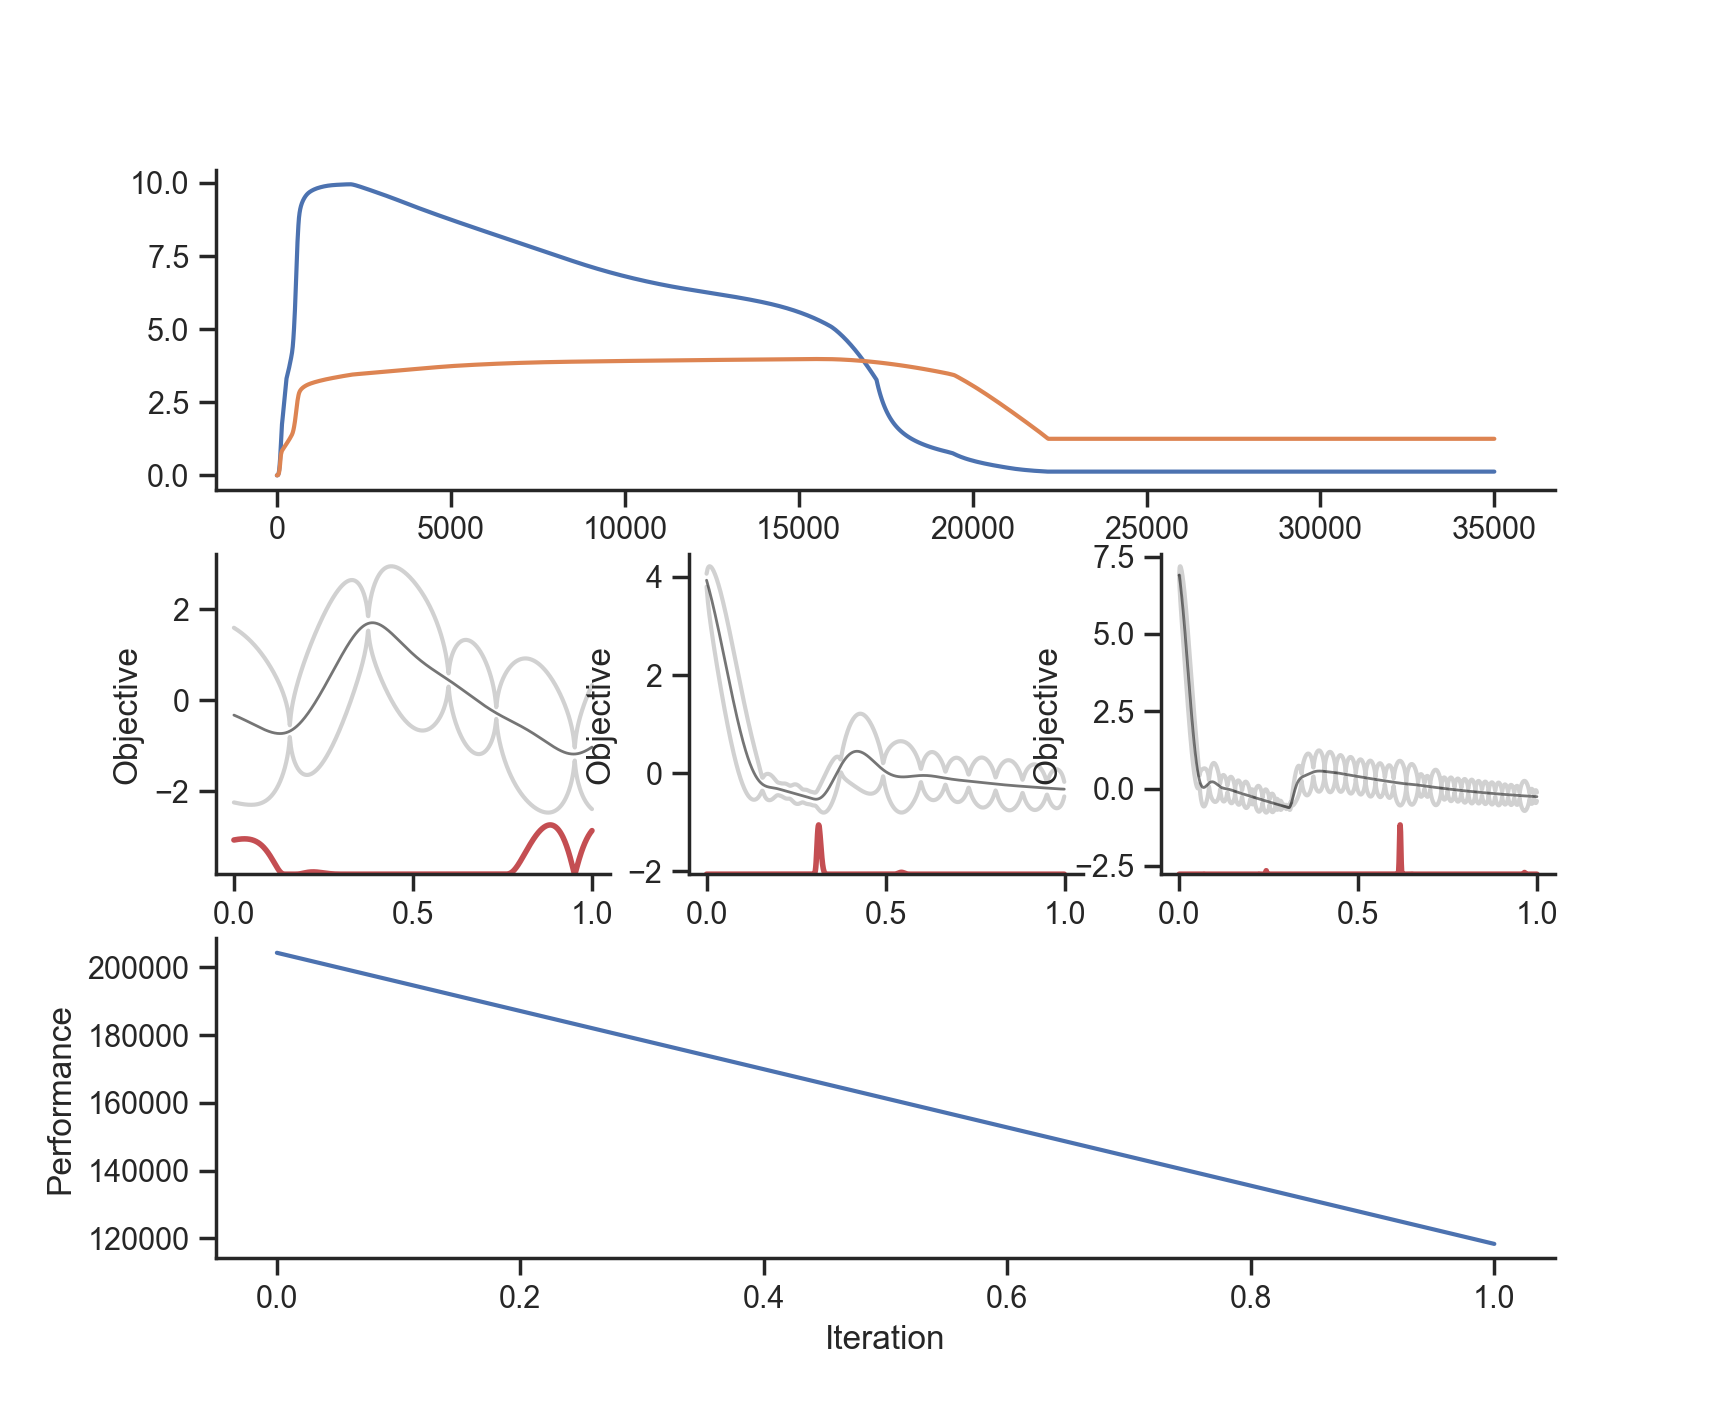

In [9]:
sns.set(style="ticks")
%matplotlib notebook
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
un_flow,_,_ = AASinglePond(1.0)
ax1.plot(un_flow)
label = ["Uncontrolled"]
flow, _, _ = AASinglePond(bay_opt_container[100].x_opt[0])
ax1.plot(flow)
sns.despine()

ax2 = plt.subplot2grid((3, 3), (1, 0))
plot_acquisition(ax2, bay_opt_container[1])
sns.despine()
ax3 = plt.subplot2grid((3, 3), (1, 1))
plot_acquisition(ax3, bay_opt_container[13])
sns.despine()
ax4 = plt.subplot2grid((3, 3), (1, 2))
plot_acquisition(ax4, bay_opt_container[51])
sns.despine()


ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
# Subplot 2 - Performance with keys
loss = []
loss_index = []
temp_ = [bay_opt_container[1], bay_opt_container[100]]
for key in temp_:
    loss.append(f_loss([key.x_opt]))
ax5.plot(loss)
sns.despine()
ax5.set_ylabel("Performance")
ax5.set_xlabel("Iteration")
plt.show()

<IPython.core.display.Javascript object>


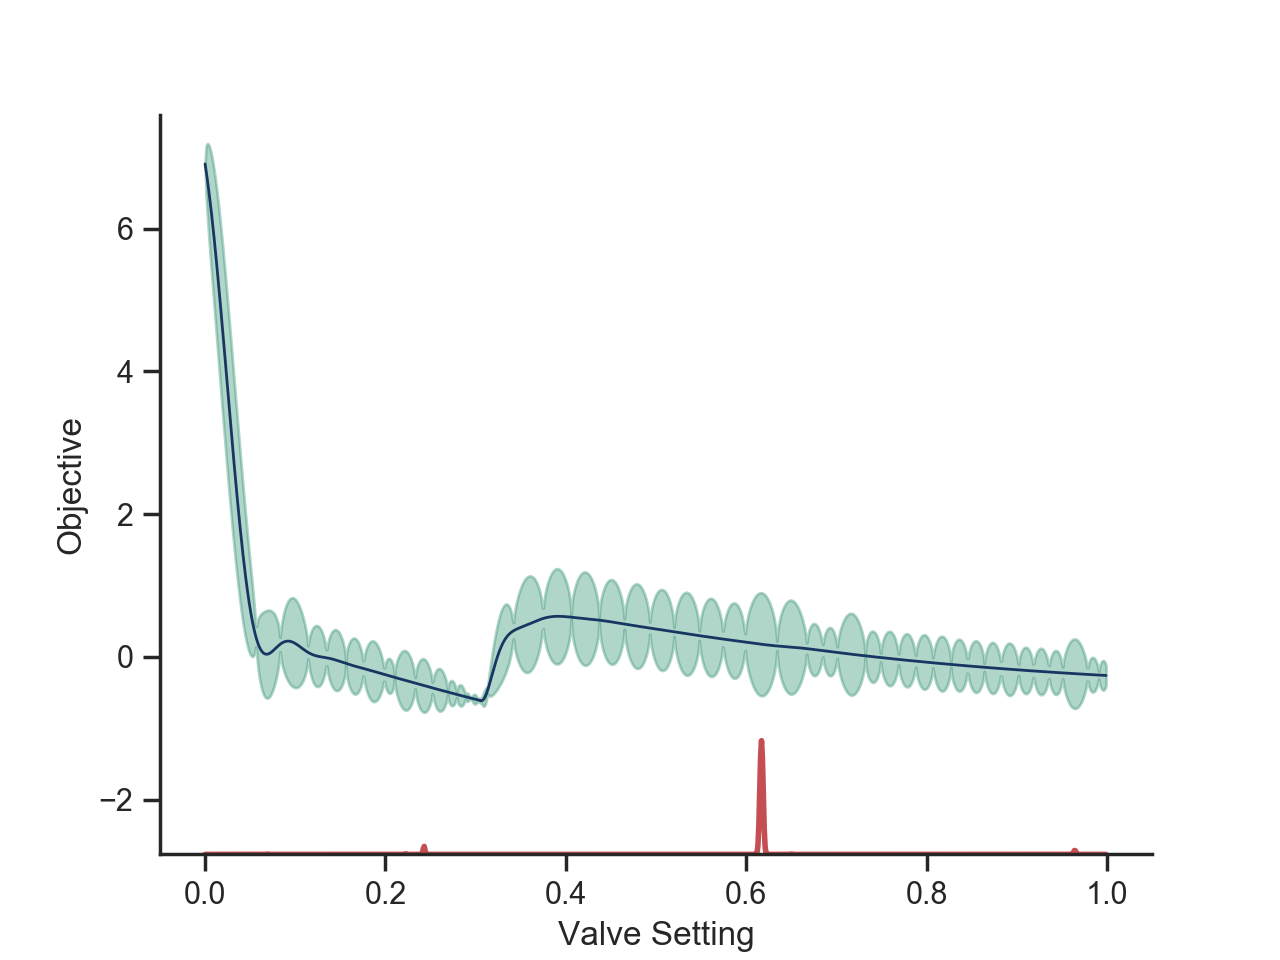

In [38]:
# Plot the convergence based on gpyopt 
def plot_acquisition(axis, model):
    bounds = model.acquisition.space.get_bounds()

    x_grid = np.arange(bounds[0][0], bounds[0][1], 0.001)
    x_grid = x_grid.reshape(len(x_grid),1)
    acqu = model.acquisition.acquisition_function(x_grid)
    acqu_normalized = (-acqu - min(-acqu))/(max(-acqu - min(-acqu)))
    m, v = model.model.predict(x_grid)

    axis.plot(x_grid, m, 'k-',lw=1,color="#183661", linewidth=1.0)
    axis.fill_between(x_grid.reshape(-1), (m-1.96*np.sqrt(v)).reshape(-1), (m+1.96*np.sqrt(v)).reshape(-1), color="#3a9679", alpha = 0.4)

    factor = max(m+1.96*np.sqrt(v))-min(m-1.96*np.sqrt(v))
    axis.plot(x_grid, 0.2*factor*acqu_normalized-abs(min(m-1.96*np.sqrt(v)))-0.25*factor,
            'r-',lw=2)

    axis.set_xlabel('Valve Setting')
    axis.set_ylabel('Objective')
    axis.set_ylim(min(m-1.96*np.sqrt(v))-0.25*factor,  max(m+1.96*np.sqrt(v))+0.05*factor)
    
ax4 = plt.subplot2grid((1, 1), (0, 0))
plot_acquisition(ax4, bay_opt_container[51])
ax4.plot(bay_opt_container[51].X, bay_opt_container[51].Y, '*')
sns.despine()

<IPython.core.display.Javascript object>


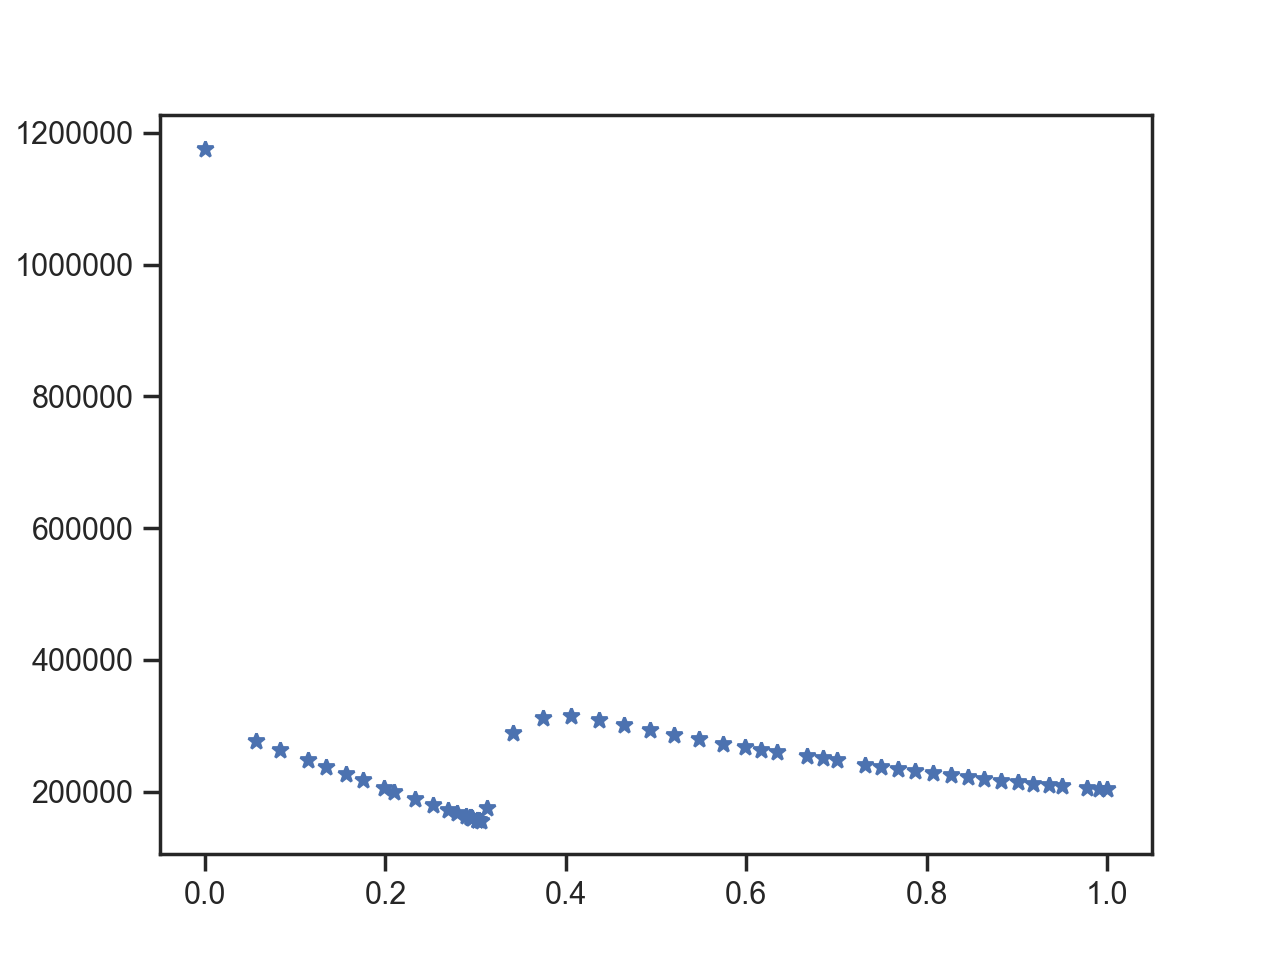

In [19]:
plt.plot(bay_opt_container[51].X, bay_opt_container[51].Y, '*')

In [39]:
temp_ = [bay_opt_container[i] for i in  np.linspace(1,100,50,dtype=int)]


In [40]:
temp_

<IPython.core.display.Javascript object>


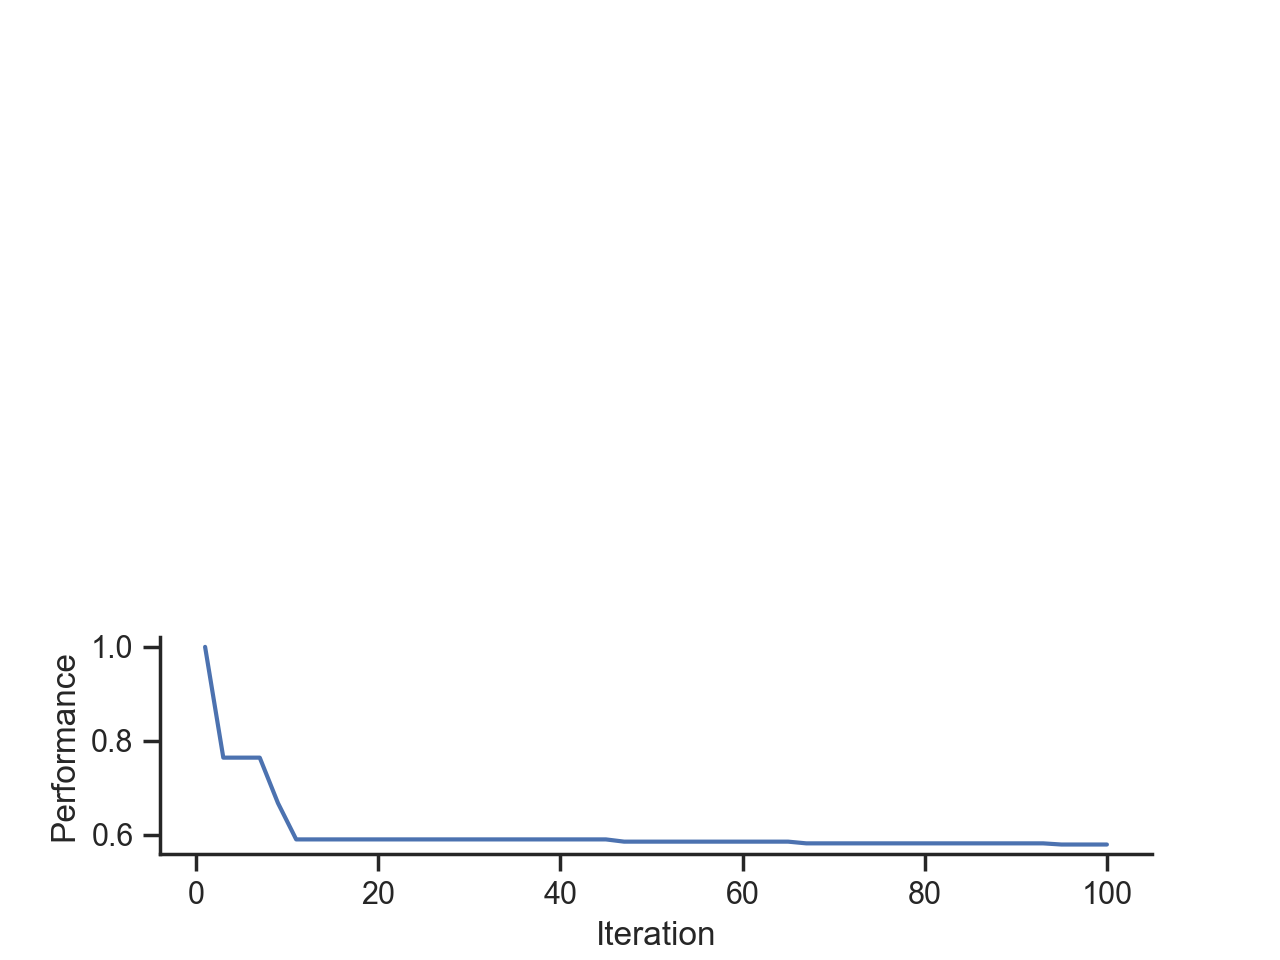

Text(0.5, 0, 'Iteration')

In [46]:
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
# Subplot 2 - Performance with keys
loss = []
loss_index = []
temp_ = [bay_opt_container[i] for i in  np.linspace(1,100,50,dtype=int)]
for key in temp_:
    loss.append(f_loss([key.x_opt]))
ax5.plot(np.linspace(1,100,50,dtype=int), np.asarray(loss)/max(loss))
sns.despine()
ax5.set_ylabel("Performance")
ax5.set_xlabel("Iteration")

In [45]:
np.asarray(loss)/max(loss)

array([1.        , 0.76434628, 0.76434628, 0.76434628, 0.66763907,
       0.59038629, 0.59038629, 0.59038629, 0.59038629, 0.59038629,
       0.59038629, 0.59038629, 0.59038629, 0.59038629, 0.59038629,
       0.59038629, 0.59038629, 0.59038629, 0.59038629, 0.59038629,
       0.59038629, 0.59038629, 0.59038629, 0.58562795, 0.58562795,
       0.58562795, 0.58562795, 0.58562795, 0.58562795, 0.58562795,
       0.58562795, 0.58562795, 0.58562795, 0.58198408, 0.58198408,
       0.58198408, 0.58198408, 0.58198408, 0.58198408, 0.58198408,
       0.58198408, 0.58198408, 0.58198408, 0.58198408, 0.58198408,
       0.58198408, 0.58198408, 0.57951674, 0.57951674, 0.57951674])